# Logistic Regression Project (Predict Ad click)

In this notebook we will use `Logistic Regression` to indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* '`Daily Time Spent on Site`': consumer time on site in minutes
* '`Age`': customer age in years
* '`Area Income`': Avg. Income of geographical area of consumer
* '`Daily Internet Usage`': Avg. minutes a day consumer is on the internet
* '`Ad Topic Line`': Headline of the advertisement
* '`City`': City of consumer
* '`Male`': Whether or not consumer was male
* '`Country`': Country of consumer
* '`Timestamp`': Time at which consumer clicked on Ad or closed window
* '`Clicked on Ad`': 0 or 1 indicated clicking on Ad

## Get the Data

In [67]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression

# 1. Exploratory Data Analysis

In [68]:
df = pd.read_csv("data/advertising.csv")
df

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                             Ad Topic Line            City  Male  \
0       Cloned 5thgeneration orchestration     Wrightburgh     0   
1       Monitored national standardization       West Jodi     1   
2         Organic bottom-line service-desk        Davidton     0   
3    Triple-buffered reciprocal time-frame  West Terrifurt     1   
4            Robust logistical utilization    South Manuel     0   
..                                     ...             ...   ...   
995          Fundamental modular algorithm       Duffystad     1   
996        Grass-roots cohesive monitoring     New Darlene     1   
997           Expanded intangible solution   South Jessica     1   
998   Proactive bandwidth-monitored policy     West Steven     0   
999        Virtual 5thgeneration emulation     Ronniemouth     0   

                    Country            Timestamp  Clicked on Ad  
0                   Tunisia  2016-03-27 00:53:11              0  
1                     Nauru  2016-04-04 01:39:02              0  
2                San Marino  2016-03-13 20:35:42              0  
3                     Italy  2016-01-10 02:31:19              0  
4                   Iceland  2016-06-03 03:36:18              0  
..                      ...                  ...            ...  
995                 Lebanon  2016-02-11 21:49:00              1  
996  Bosnia and Herzegovina  2016-04-22 02:07:01              1  
997                Mongolia  2016-02-01 17:24:57              1  
998               Guatemala  2016-03-24 02:35:54              0  
999                  Brazil  2016-06-03 21:43:21              1  

[1000 rows x 10 columns]

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [70]:
df.describe()

Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage         Male  Clicked on Ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0.000000        0.50000  
75%              218.792500     1.000000        1.00000  
max              269.960000     1.000000        1.00000

In [71]:
df["Clicked on Ad"].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

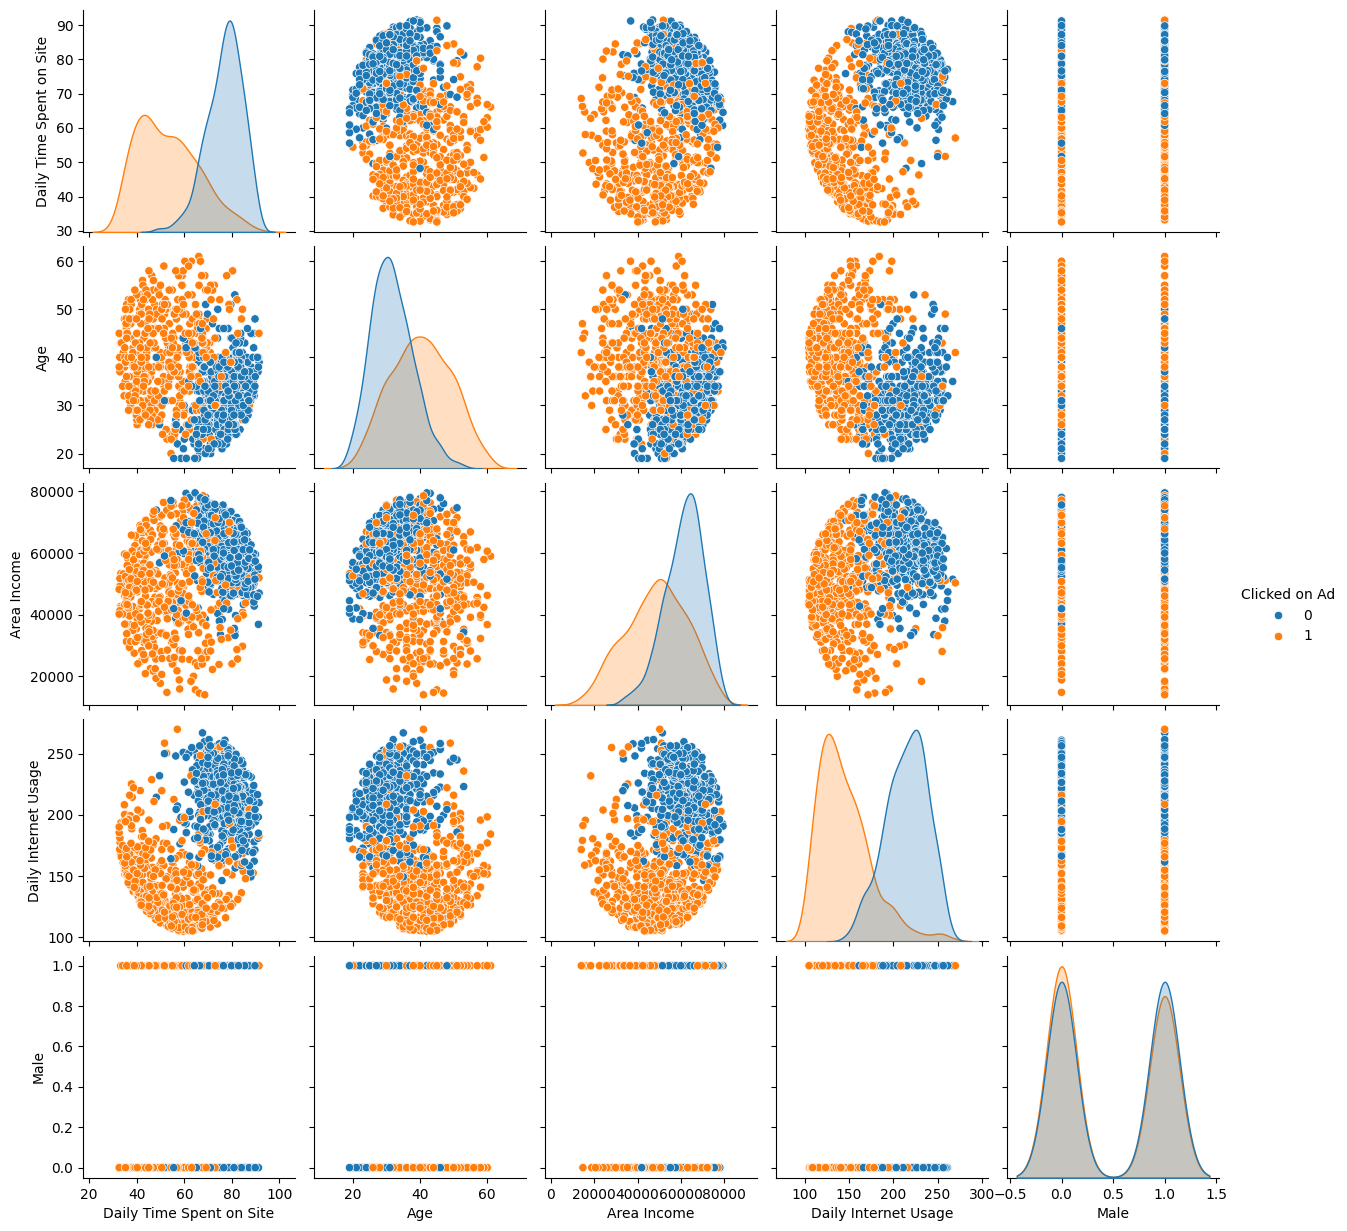

In [72]:
sns.pairplot(df, hue="Clicked on Ad")

<Axes: >

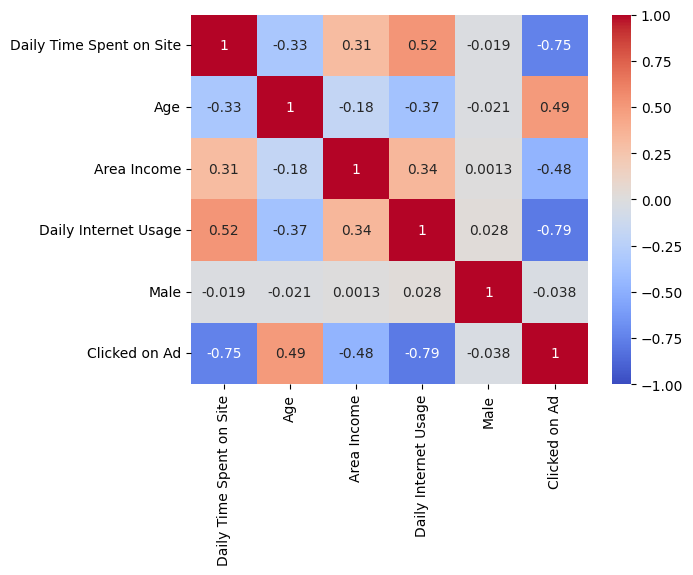

In [73]:
sns.heatmap(df.corr(numeric_only=True), annot= True, cmap="coolwarm", vmin=-1)

# 2. Prepare Data for Logistic Regression


In [74]:
df.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

In [75]:
df["Ad Topic Line"].nunique()

1000

In [76]:
"Monitored national standardization".split(" ")

['Monitored', 'national', 'standardization']

In [77]:
palabras = []

for i in df["Ad Topic Line"]:
    for j in i.split(" "):
        palabras.append(j.lower())


In [78]:
pd.Series(palabras).value_counts().sort_values(ascending=False)

interface          33
solution           29
system             24
user               24
secured            23
                   ..
static              4
persistent          4
profit-focused      4
intelligence        4
functionalities     4
Name: count, Length: 315, dtype: int64

In [79]:
df["inter_id"] = np.where(df["Ad Topic Line"].str.contains("interface"), 1, 0)


In [80]:
df["soution_id"] = np.where(df["Ad Topic Line"].str.contains("solution"), 1, 0)
df["system_id"] = np.where(df["Ad Topic Line"].str.contains("system"), 1, 0)


In [81]:
df

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                             Ad Topic Line            City  Male  \
0       Cloned 5thgeneration orchestration     Wrightburgh     0   
1       Monitored national standardization       West Jodi     1   
2         Organic bottom-line service-desk        Davidton     0   
3    Triple-buffered reciprocal time-frame  West Terrifurt     1   
4            Robust logistical utilization    South Manuel     0   
..                                     ...             ...   ...   
995          Fundamental modular algorithm       Duffystad     1   
996        Grass-roots cohesive monitoring     New Darlene     1   
997           Expanded intangible solution   South Jessica     1   
998   Proactive bandwidth-monitored policy     West Steven     0   
999        Virtual 5thgeneration emulation     Ronniemouth     0   

                    Country            Timestamp  Clicked on Ad  inter_id  \
0                   Tunisia  2016-03-27 00:53:11              0         0   
1                     Nauru  2016-04-04 01:39:02              0         0   
2                San Marino  2016-03-13 20:35:42              0         0   
3                     Italy  2016-01-10 02:31:19              0         0   
4                   Iceland  2016-06-03 03:36:18              0         0   
..                      ...                  ...            ...       ...   
995                 Lebanon  2016-02-11 21:49:00              1         0   
996  Bosnia and Herzegovina  2016-04-22 02:07:01              1         0   
997                Mongolia  2016-02-01 17:24:57              1         0   
998               Guatemala  2016-03-24 02:35:54              0         0   
999                  Brazil  2016-06-03 21:43:21              1         0   

     soution_id  system_id  
0             0          0  
1             0          0  
2             0          0  
3             0          0  
4             0          0  
..          ...        ...  
995           0          0  
996           0          0  
997           1          0  
998           0          0  
999           0          0  

[1000 rows x 13 columns]

In [82]:
df["City"].nunique()

969

In [83]:
df["Country"].nunique()

237

In [84]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(df["City"])
df["city_id"] = le.transform(df["City"])


In [85]:
df

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                             Ad Topic Line            City  Male  \
0       Cloned 5thgeneration orchestration     Wrightburgh     0   
1       Monitored national standardization       West Jodi     1   
2         Organic bottom-line service-desk        Davidton     0   
3    Triple-buffered reciprocal time-frame  West Terrifurt     1   
4            Robust logistical utilization    South Manuel     0   
..                                     ...             ...   ...   
995          Fundamental modular algorithm       Duffystad     1   
996        Grass-roots cohesive monitoring     New Darlene     1   
997           Expanded intangible solution   South Jessica     1   
998   Proactive bandwidth-monitored policy     West Steven     0   
999        Virtual 5thgeneration emulation     Ronniemouth     0   

                    Country            Timestamp  Clicked on Ad  inter_id  \
0                   Tunisia  2016-03-27 00:53:11              0         0   
1                     Nauru  2016-04-04 01:39:02              0         0   
2                San Marino  2016-03-13 20:35:42              0         0   
3                     Italy  2016-01-10 02:31:19              0         0   
4                   Iceland  2016-06-03 03:36:18              0         0   
..                      ...                  ...            ...       ...   
995                 Lebanon  2016-02-11 21:49:00              1         0   
996  Bosnia and Herzegovina  2016-04-22 02:07:01              1         0   
997                Mongolia  2016-02-01 17:24:57              1         0   
998               Guatemala  2016-03-24 02:35:54              0         0   
999                  Brazil  2016-06-03 21:43:21              1         0   

     soution_id  system_id  city_id  
0             0          0      961  
1             0          0      903  
2             0          0      111  
3             0          0      939  
4             0          0      805  
..          ...        ...      ...  
995           0          0      126  
996           0          0      488  
997           1          0      798  
998           0          0      935  
999           0          0      744  

[1000 rows x 14 columns]

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
 10  inter_id                  1000 non-null   int64  
 11  soution_id                1000 non-null   int64  
 12  system_id                 1000 non-null   int64  
 13  city_id                   1000 non-null   int64  
dtypes: float6

In [87]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
 10  inter_id                  1000 non-null   int64         
 11  soution_id                1000 non-null   int64         
 12  system_id            

In [89]:
df["meses"] = df["Timestamp"].dt.month
df["anio"] = df["Timestamp"].dt.year
df["dia"] = df["Timestamp"].dt.day

In [90]:
df["hora"] = df["Timestamp"].dt.hour


In [91]:
df

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                             Ad Topic Line            City  Male  \
0       Cloned 5thgeneration orchestration     Wrightburgh     0   
1       Monitored national standardization       West Jodi     1   
2         Organic bottom-line service-desk        Davidton     0   
3    Triple-buffered reciprocal time-frame  West Terrifurt     1   
4            Robust logistical utilization    South Manuel     0   
..                                     ...             ...   ...   
995          Fundamental modular algorithm       Duffystad     1   
996        Grass-roots cohesive monitoring     New Darlene     1   
997           Expanded intangible solution   South Jessica     1   
998   Proactive bandwidth-monitored policy     West Steven     0   
999        Virtual 5thgeneration emulation     Ronniemouth     0   

                    Country           Timestamp  Clicked on Ad  inter_id  \
0                   Tunisia 2016-03-27 00:53:11              0         0   
1                     Nauru 2016-04-04 01:39:02              0         0   
2                San Marino 2016-03-13 20:35:42              0         0   
3                     Italy 2016-01-10 02:31:19              0         0   
4                   Iceland 2016-06-03 03:36:18              0         0   
..                      ...                 ...            ...       ...   
995                 Lebanon 2016-02-11 21:49:00              1         0   
996  Bosnia and Herzegovina 2016-04-22 02:07:01              1         0   
997                Mongolia 2016-02-01 17:24:57              1         0   
998               Guatemala 2016-03-24 02:35:54              0         0   
999                  Brazil 2016-06-03 21:43:21              1         0   

     soution_id  system_id  city_id  meses  anio  dia  hora  
0             0          0      961      3  2016   27     0  
1             0          0      903      4  2016    4     1  
2             0          0      111      3  2016   13    20  
3             0          0      939      1  2016   10     2  
4             0          0      805      6  2016    3     3  
..          ...        ...      ...    ...   ...  ...   ...  
995           0          0      126      2  2016   11    21  
996           0          0      488      4  2016   22     2  
997           1          0      798      2  2016    1    17  
998           0          0      935      3  2016   24     2  
999           0          0      744      6  2016    3    21  

[1000 rows x 18 columns]

In [92]:
sns.heatmap(df.corr(numeric_only= True), annot=True, cmap="coolwarm", vmin=-1)

<Axes: >


#### 2. Train test split


In [93]:
X = df[["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage"]]
y = df["Clicked on Ad"]

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20, random_state=10)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 4)
(800,)
(200, 4)
(200,)



#### 3. StandardScaler()


In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 3. Implement a Logistic Regression in Scikit-Learn and predict.

In [96]:
modelo_log_r = LogisticRegression(max_iter=1000)

modelo_log_r.fit(X_train_scaler, y_train)
pred = modelo_log_r.predict(X_test_scaler)

# 4. Evaluation


#### 0. Accuracy

In [97]:
accuracy_score(y_test, pred)

0.945


#### 1. Confusion Matrix


In [98]:
confusion_matrix(y_test, pred)

array([[90,  6],
       [ 5, 99]])

In [99]:
sns.heatmap(confusion_matrix(y_test, pred, normalize= "true"), annot= True)

<Axes: >


#### 2. Precision


Cuántos son realmente 1s, de todos los que ha predicho como 1s

TP / (TP + FP)

In [100]:
precision_score(y_test, pred)

0.9428571428571428



#### 3. Recall


Cuántos has predicho como 1, de los que realmente eran 1s

TP / (TP + FN)

In [101]:
recall_score(y_test, pred)

0.9519230769230769



#### 4. F1 Score


2 * p * r / (r + p)

In [102]:
f1_score(y_test, pred)

0.9473684210526315



#### 5. ROC curve

In [103]:
from sklearn.metrics import roc_auc_score

In [104]:
roc_auc_score(y_test, pred)

np.float64(0.9447115384615384)

In [105]:
pred_proba = modelo_log_r.predict_proba(X_test_scaler)

In [106]:
pred_proba

array([[8.71113184e-05, 9.99912889e-01],
       [1.36410960e-03, 9.98635890e-01],
       [9.90810789e-01, 9.18921053e-03],
       [8.41161512e-01, 1.58838488e-01],
       [4.11221774e-01, 5.88778226e-01],
       [4.25484413e-05, 9.99957452e-01],
       [6.21510392e-01, 3.78489608e-01],
       [9.78634467e-01, 2.13655334e-02],
       [9.94075644e-01, 5.92435563e-03],
       [9.92683436e-01, 7.31656405e-03],
       [9.93389371e-01, 6.61062913e-03],
       [4.78864407e-01, 5.21135593e-01],
       [4.90223919e-04, 9.99509776e-01],
       [3.53870604e-03, 9.96461294e-01],
       [9.88952676e-01, 1.10473243e-02],
       [9.89624177e-01, 1.03758225e-02],
       [3.24759311e-04, 9.99675241e-01],
       [9.92239990e-01, 7.76001029e-03],
       [9.86014169e-01, 1.39858310e-02],
       [9.80524046e-01, 1.94759540e-02],
       [1.60865511e-02, 9.83913449e-01],
       [9.34581112e-01, 6.54188884e-02],
       [4.33644622e-01, 5.66355378e-01],
       [3.21591232e-03, 9.96784088e-01],
       [8.324696

In [65]:
from sklearn.metrics import roc_curve

fpr, tpr, t = roc_curve(y_test, pred_proba[:,1])


In [109]:
plt.plot(fpr, tpr)
plt.xlabel("Falsos positivos")
plt.ylabel("verdaderos positivos")

Text(0, 0.5, 'verdaderos positivos')



#### 6. P-R curve

Text(0, 0.5, 'recall')

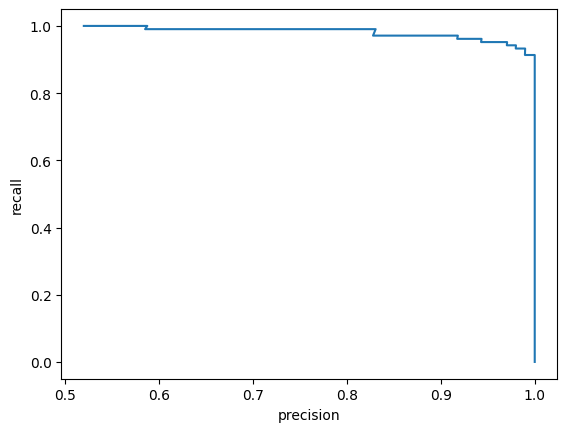

In [110]:
from sklearn.metrics import precision_recall_curve

precision, recall, t = precision_recall_curve(y_test, pred_proba[:,1])

plt.plot(precision, recall)

plt.xlabel("precision")
plt.ylabel("recall")